In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import timeit
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
import seaborn as sns

In [2]:
preice_data = pd.read_csv("Stainless-Steel-Prices-Forecasty-Assignment.csv")

In [3]:
#check if any nan values are present in the data, and also check the different data types present in the data
# preice_data.isna().sum()
preice_data.info()

#no column is missing values
#All are numerical data, makes the job easier!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

In [4]:
#check if any column has less than 3 variations (3 is an arbitrary assumption)
preice_data[[column for column in preice_data if preice_data[column].count() < 3]].shape

#This check will help us identify if there is an direct unuseful feature, whose value is almost constant. 

(84, 0)

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StainlessSteelPrice', ylabel='Density'>

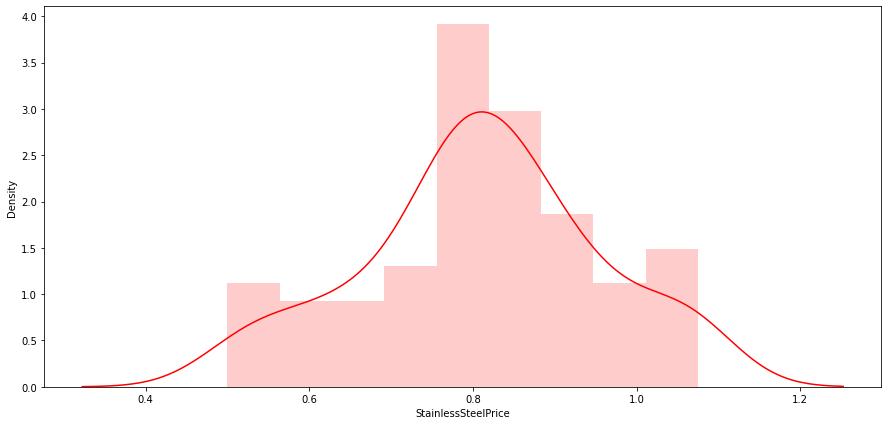

In [5]:
#plot the distribution of the target variable
sns.distplot(preice_data['StainlessSteelPrice'], color='r', hist_kws={'alpha': 0.2})

#The distribution doesn't have a ny anomalies and a good normal distribution can be easily approximated.

<AxesSubplot:>

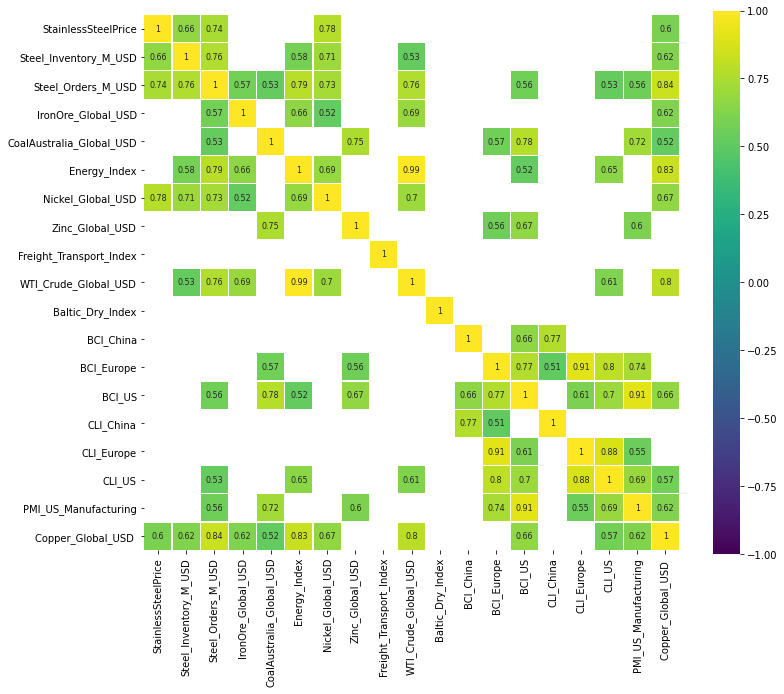

In [6]:
# Heat map of the covariance matrix, observe similar features and the different feature correlation with the target variable
df_num = preice_data.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

#

Text(0.5, 0, 'Time')

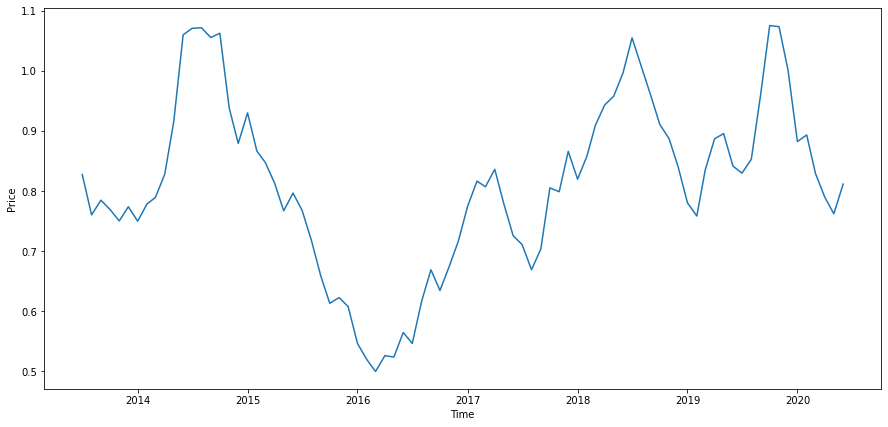

In [7]:
#plot the target variable along with time and look for possible anomalies and trends.
preice_data["Date"] = pd.to_datetime(preice_data["Date"])
plt.plot(preice_data["Date"],preice_data["StainlessSteelPrice"])

plt.ylabel("Price")
plt.xlabel("Time")